# TEWA TUTORIAL

# **Reinforcement Learning**

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,optimize

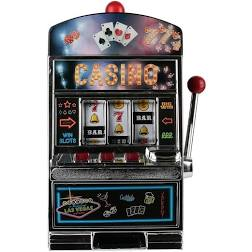

# Reinforcement Learning Tutorial
# Multi-armed bandit 

in this tutorial,we will be simulating a human experimental subject, who is trying to win the most money, while playing on 3 bandits for N trials



Set up initial parameters of simulation

In [355]:
n_bandit = 3  # number of bandits
p_reward = np.array([.8, .2, .4])   # probabilty of reward for each bandit
reward = 5   # amount of reward (same for all bandits) for wins 
alpha = 0.1

Implement the Softmax choice function

the goal of this function is to turn values into probabilites, with a single parameter Temp (Temperature), that controls the explore-exploit trade-off, with higher temperatures corresponding to more exploration

https://en.wikipedia.org/wiki/Softmax_function



In [4]:
def soft_max(vals, temp=1):   # default value for temperature is 1
    return (np.exp(vals/temp))/(np.sum(np.exp(vals/temp)))

# Test Softmax Function 
with different values, but the same temperatue

In [40]:
test_val_1 = np.array([.8,1.3,.5])
test_val_2 = np.array([.8,1.5,.5])

print(soft_max(test_val_1))
print(soft_max(test_val_2))

[0.29502533 0.48641453 0.21856014]
[0.26634202 0.53634696 0.19731102]


# Test Softmax Function 
with same values, but different temperature

In [41]:
print(1, soft_max(test_val_1, 1))
print(4, soft_max(test_val_1,4))
print(.5, soft_max(test_val_1,.5))

1 [0.29502533 0.48641453 0.21856014]
4 [0.32670216 0.37020204 0.3030958 ]
0.5 [0.23435156 0.63703358 0.12861486]


# Simulate 3 armed bandit Experiment 

for n trials (and visualize results)

we want to simulate the choice and the learning of the values


in this simulation, we have to randomize 2 things:
1. which bandit is chosen (based on choice probabilities defined by softmax)
2. whether there is a reward (based on the reward probabilities defined at the top of the notebook).

### as a first step simulate a single trial of choosing among 3 bandits with our choice policy  (based on equal initial values)
 we can use the np.random.multinomial  to make a random choice among 3 options-- the choice is not uniformly random, but uses the choice probabilities from the policy!

In [386]:
vt = np.random.normal(1, 1, n_bandit)  # 3 random or uniform starting values np.random.normal(1,1,3)

In [409]:
#print(vt)
choice_p = soft_max(vt, 1) ## use the softmax here with the values estiamtes and some tempereature , eg=1 
#print(choice_p)
choice = np.random.multinomial(1, choice_p).argmax() # simulate a choice
print("We have chosen bandit no.", choice+1)

We have chosen bandit no. 3


### once we have chosen, we have to simulate the random reward 


you can randomize the actual reward with np.random.rand

use P_reward as the probability of reward for each choice


In [410]:
print("probability for this choice", p_reward[choice])

probability for this choice 0.4


In [411]:
actual_reward = np.random.binomial(1, p_reward[choice]) * reward
print("the actual reward is", actual_reward)

the actual reward is 5


### after getting the reward the "learning" happens: the value update with the learning rate alpha (go back to the slides if you need a reminder).
the key is that you only update the values for the choice that was made

In [412]:
vt[choice] = vt[choice] + alpha*(actual_reward - vt[choice])

In [413]:
vt

array([0.48700638, 1.97151637, 1.93223307])

### putting it together for an experiment with multiple trials

you will need a for cycle, and will have to use the numpy array choices and rewards with indexing to store for each trial the choice and the obtained reward. 

if you code works, the visualization code should run without any changes  (use n for the trial number)

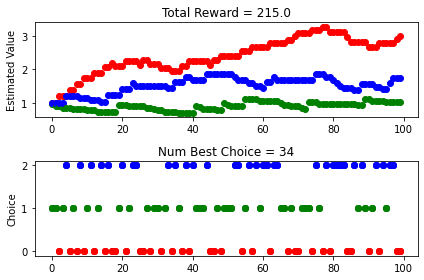

In [467]:
n_trial = 100   # number of trials
vt = np.ones(n_bandit)  # intialize starting values at 1  - uniform

cols = ['r','g','b']
alpha = .05  # learning rate
temperature = 10  # temperature
fig, ax = plt.subplots(2, 1)
rewards = np.zeros(n_trial)  # store obtained rewards
choices = np.intp(np.zeros(n_trial))  # store choices 

for i in range(0, n_trial):
    choice_p = soft_max(vt, temperature) 
    choice = np.random.multinomial(1, choice_p).argmax()
    actual_reward = np.random.binomial(1, p_reward[choice]) * reward
    vt[choice] = vt[choice] + alpha * (actual_reward - vt[choice])
    choices[i] = choice
    rewards[i] = actual_reward

     # visualization starts here
    for k in range(n_bandit):
        ax[0].scatter(i, vt[k], color=cols[k])
        ax[1].scatter(i, choices[i], color=cols[choices[i]])

ax[0].set_ylabel('Estimated Value')
ax[1].set_ylabel('Choice')
ax[0].set_title('Total Reward = ' + str(np.sum(rewards)))
ax[1].set_title('Num Best Choice = ' + str(np.sum(choices==0)))
fig.tight_layout()  

# Function for Experiment Simulation

take 3 inputs:
1. Learning rate
2. Temperature
3. number of trials


return 3 things:

1. Choices
2. Obtained rewards
3. estimated reward values


In [453]:
def sim_exp(alpha, temp, n_trial, n_bandit, reward):
    """Simulate choices and reward for give number of bandits"""
    
    vt = np.ones(n_bandit) 
    rewards = np.zeros(n_trial) 
    choices = np.intp(np.zeros(n_trial)) 

    for i in range(0, n_trial):
        choice_p = soft_max(vt, temperature) 
        choice = np.random.multinomial(1, choice_p).argmax()
        actual_reward = np.random.binomial(1, p_reward[choice]) * reward
        vt[choice] = vt[choice] + alpha * (actual_reward - vt[choice])
        choices[i] = choice
        rewards[i] = actual_reward


    return choices, rewards, vt

# Simulate Experiment

In [454]:
alpha=.1
temp=.4
n_trial=200
choices, rewards ,vt = sim_exp(alpha, temp, n_trial, 3, 5)
print('Best Choice: ',np.sum(choices==0),'Tot Reward: ',np.sum(rewards))

Best Choice:  121 Tot Reward:  610.0


In [456]:
choices

array([0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 1])

In [457]:
rewards

array([5., 0., 5., 0., 0., 0., 0., 5., 5., 0., 5., 5., 0., 0., 0., 5., 0.,
       5., 0., 5., 0., 5., 0., 0., 0., 0., 0., 5., 0., 5., 5., 0., 5., 0.,
       0., 0., 0., 5., 5., 5., 0., 5., 0., 5., 0., 5., 5., 5., 5., 5., 5.,
       0., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 5., 5., 0., 5., 0.,
       0., 0., 5., 5., 0., 5., 0., 0., 5., 0., 0., 0., 5., 5., 0., 5., 5.,
       0., 5., 0., 5., 5., 5., 5., 5., 0., 0., 5., 5., 0., 5., 0., 5., 0.,
       0., 5., 5., 5., 5., 5., 5., 0., 5., 5., 0., 5., 5., 5., 5., 0., 0.,
       0., 5., 5., 0., 5., 5., 5., 0., 5., 0., 5., 5., 5., 5., 0., 5., 5.,
       5., 5., 5., 0., 5., 0., 0., 0., 0., 5., 0., 5., 5., 5., 5., 5., 0.,
       5., 5., 5., 5., 5., 5., 0., 5., 5., 5., 5., 5., 5., 5., 0., 0., 5.,
       5., 0., 5., 5., 5., 0., 5., 0., 0., 5., 0., 0., 5., 5., 5., 5., 5.,
       0., 0., 5., 5., 5., 5., 5., 0., 0., 5., 0., 5., 0.])



# **Switch Perspective,**
we have the data of the experiment, we want to analyze the simulated participants
(get underyling parameters, that could best explain their behavior)

# Calculate Likelihood of Data (choices+ rewards) for some parameters alpha/temp
4 input
1. Guess for Alpha
2. Guess for temperature
3. sequence of choices
4. sequence of obtained rewards

output:
likelihood for each trial   

the idea here is that we know what the participant chose and the reward received, we want to figure how likely those choices are by assuming some learning rate and choice policy temperature


likelihood $p(choice sequence|alpha,temperature,rewards)$

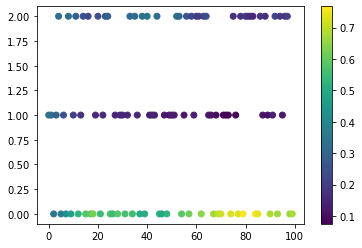

In [480]:
def RL_likelihood(alpha, temp, choices, rewards):
    n_trial = len(choices)
    lh_tr = np.zeros(n_trial)
    vt = np.ones(n_bandit)  
    for i in range(n_trial):
        choice_p = soft_max(vt, temp)
        lh_tr[i] =  choice_p[choices[i]]
        vt[choices[i]] = vt[choices[i]] + alpha * (rewards[i] - vt[choices[i]])
    
    return lh_tr

lh = RL_likelihood(.05, 1, choices, rewards)

plt.scatter(range(len(choices)), choices, c=lh)
plt.colorbar()

# Modify the above function, so that it returns the total negative log likelihood
(you only need to change the ouptut, the calculation is the same


In [ ]:
def RL_logL(Alpha, Temp, Choices, Rewards):
    NTrial = len(Choices)
    LikelihoodTr = np.zeros(NTrial)
    Vt = np.ones(NBandit)
    for n in range(NTrial):
        ChoiceP = SoftMax(Vt,Temp)
        LikelihoodTr[n] =  # YOUR CODE-key line 
        Vt[Choices[n]] = Vt[Choices[n]]+Alpha*(Rewards[n]-Vt[Choices[n]])
    return -np.sum(np.log(LikelihoodTr))

In [ ]:
RL_logL(.01,3,Choices,Rewards)

217.67628956847236

In [ ]:
RL_logL(.01,10,Choices,Rewards)

219.0950883474975

In [ ]:
RL_logL(.05,1,Choices,Rewards)

207.43556228323447

In [ ]:
RL_logL(.05,.5,Choices,Rewards)

201.400721863506

In [ ]:
RL_logL(.1,.5,Choices,Rewards)

199.94860148369824

# test different values of alpha and temperature and calculate the log-likelihood

In [ ]:
RL_logL(Alpha,Temp,Choices,Rewards)

106.9002177470153

In [ ]:
RL_logL(.1,10,Choices,Rewards)

109.52896780407431

# Plot Relationship between alpha and log likelihood

Text(0.5, 0, 'Learning Rate')

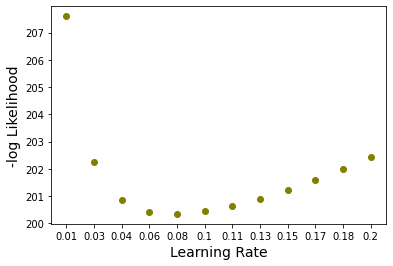

In [ ]:
Alphas=np.linspace(.01,.2,12)

plt.figure()
# YOUR CODE
x=plt.xticks(np.arange(len(Alphas)),np.round(Alphas,2))
plt.ylabel('-log Likelihood',fontsize=14)
plt.xlabel('Learning Rate',fontsize=14)

It is better to automatize the above 'search' process
--> numerical optimization based on maximum likelihood to find best alpha-temperature best parameter combination


# Model fitting- maximum likelihood

we need to modify the log likelihood function, so that it can be used with an optimizer (scipy.minimize)

the only trick is passing the parameters and arguments in combined arrays,
the rest is the same as the negative log likelihood funciton above

In [ ]:
def RL_fit_logL(pars,args):
  Alpha,Temp=pars[0],pars[1]
  Choices,Rewards=args[0],args[1]
  NTrial=len(Choices)
  LikelihoodTr=np.zeros(NTrial)
  Vt=np.ones(NBandit)*.5
  for n in range(NTrial):
    ChoiceP=SoftMax(Vt,Temp)
    LikelihoodTr[n]= # YOUR CODE-key line 
    Vt[Choices[n]]=Vt[Choices[n]]+Alpha*(Rewards[n]-Vt[Choices[n]])
  return -np.sum(np.log(LikelihoodTr))


In [ ]:
?optimize.minimize

# run optimizer 

In [ ]:
optimize.minimize(RL_fit_logL,x0=[.5,.5],args=[Choices,Rewards])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Runtim

      fun: nan
 hess_inv: array([[0.63347276, 0.47931143],
       [0.47931143, 0.37389301]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 465
      nit: 2
     njev: 116
   status: 2
  success: False
        x: array([-705.96885659, -652.12842265])

Change the number of trials in the simulation

# Run optimizer with bounds
x is the final value of optimization
for reliable model fitting we need to pass bounds for the optimizaiton
(as negative learning rate and temperature do not make sense)


---



In [ ]:
optimize.minimize(RL_fit_logL,x0=[.5,.5],args=[Choices,Rewards],bounds=[(0,1),(0,5)])

      fun: 199.7954319094943
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00044338, -0.00104592])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 8
   status: 0
  success: True
        x: array([0.13271273, 0.50027208])

 ## Homework  1
 
 Changing environments: above reward probability is fixed , making the task of the 'experimental participant' relatively easy, since once you know the best option, you can just always choose it. 

 Try to modify the code above, to make an experimental simulation where the rewards probabilities of the bandits change over time (but stay within the range 0-1).  
 
Simulate 300 trials, where there is a change every 50 trials, when the reward reward probabilty values change (and also the identity of the best bandit)

Explore different values of alpha and temperature in this experiment, and visualize your results (good values are the ones that lead to a high total reward).

Visualize the outcome (including when the change in value occurs). As an inspiration, you could use the figure on the lecture slide 8. However that is for 1 bandit only.

Make 3 figures, where you show  how 3 different values of alpha (.01,.03,.1) affect the leanring of the reward probability.
Which one seems the best in this changing environment?




## Homework 2 
modify the in-class code that instead of a 3 bandit tasks, it is a real N-bandit task, where the choice is simulated among N-bandits, and the reward probabilty is random on the range 0-1 for each bandit.